In [1]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Esta libreria nos ayudara a centrar las imagenes que vamos a mostrar en la consola
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
def instrucctions():
    
    """
    When calling it, it returns us the instructions of the game.
    """
    
    print('The rules of SUPER TIC TAC TOE are:\n')
    print('1. The game is played on a grid thats 3 squares by 3 squares.\n')
    print('2. You are X, your friend (or the computer in this case) is O. Players take turns putting their marks in empty squares.\n')
    print('3. The first player to get 3 of her marks in a row (up, down, across, or diagonally) is the winner.\n')
    print('4. When all 9 squares are full, the game is over. If no player has 3 marks in a row, the game ends in a tie.\n')
    print('5. To play Player vs Machine enter 1, to play Player vs Player enter 0.')
    print('6. The positions on the board are:')
    
    # Estas son las posiciones del tablero de juego.
    print('                                       | 1 | 2 | 3 |')
    print('                                       | 4 | 5 | 6 |')
    print('                                       | 7 | 8 | 9 |')
    

In [3]:
def show_board(board):
    """
    Show us the game board.
    """
    
    # Le pasamos el tablero de juego y nos lo muestra en pantalla con las fichas jugadas.
    print('                                       |', board[0], '|', board[1], '|', board[2], '|')
    print('                                       |', board[3], '|', board[4], '|', board[5], '|')
    print('                                       |', board[6], '|', board[7], '|', board[8], '|')

In [4]:
def permutation(L):
    
    """
    This function allows us to perform the permutation of a list where there are no 
    repetitions and no order.
    """
    
    combination = []          # Creamos una lista vacio
    for i in range(len(L)):    
        x = L[i:i+3]          # Le damos a x el valor de L desde i hasta i=3. Si i=0 agarramos todo el arreglo 
        length = len(x)       # pero si i=1 agarramos desde 1 hasta 4 (no importa que agarremos mas de los que hay toma hasta el ultimo)
        if length != 3:       
            x = x + L[:3-length] # Ejm: [6,2,3] si i=1 entonces x=[2,3] Al entrar al if L[:3-2] = L[:1],
        combination.append(x)    # es decir nos da [6] y obtenemos [2,3,6]
    
    return combination

In [5]:
def choose_letter():
    
    """
    Allows the user to choose whether to play Tic-Tac-Toe with the 'X' or 'O' token.
    """
    
    while True:
        user_var = input('Choose the tiles you want to play with. You can choose "O" or "X".\n') # Input del usuario
        
        if user_var == 'help':
            instrucctions()
        elif user_var == 'O':  # Si el usuario escoge X la computadora juega con O
            cpu_var = 'X'
            print(f'You have choose the letter {user_var}. The other player will play with {cpu_var}')
            break
            
        elif user_var == 'X': # Si el usuario escoge O la computadora juega con X
            cpu_var = 'O'
            print(f'You have choose the letter {user_var}. The other player will play with {cpu_var}')
            break

        else:                 # Si el usuario no escoge ni X o O se mostrara el siguiente mensaje de ERROR
            print('\nERROR --> You did not enter either "X" or "O". Please enter any of these options\n')
            
    return user_var, cpu_var

In [6]:
def user_imput(game_table, user_var):

    """
    Receive the position where the user wants to play his token. If the user enters incorrect values, 
    the corresponding messages are displayed on the screen.
    """
    
    while True:
        try:
            x = input('\033[1m' + '\nChoose the position where you wanna play (from 1 to 9):\n' + '\033[0m')  # Le preguntamos donde desea jugar
            if x == 'help':  # Si escribe la palabta help se ejecuta la funcion instrucctions() que muestra las instrucciones
                instrucctions()
            else:
                x = int(x)
                if 1 <= x <= 9:
                    if game_table[x-1] == '-':
                        game_table[x-1] = user_var
                        break
                    else :
                        print('You choose a position where you cant play. Choose again.\n')
                else:
                    print('The given coordinates are wrong. Please introduce a new ones.\n')
                
        except ValueError: # En caso de que usuario introduzca un palabra, evitamos el error con el except y el codigo sigue corriendo
            print('You have introduced a word not a number')

In [7]:
def check_block_win(game_table, comb, letter, cpu_var, move):
    
    # Esta funcion nos ayuda a que el codigo sea mas limpio, ya que no repetimos lo mismo muchas veces
    
    for i, j, k in comb:
        # Preguntamos si la letra (X o O) se encuentra en dos posiciones adyacentes y la tercera casilla esta vacia
        # Si ese es el caso, entonces tenemos que ganar o bloquear, depende de lo que queramos
        
        if game_table[i] == letter and game_table[j] == letter and game_table[k] == '-' and move ==0:
            game_table[k] = cpu_var
            move = 1
            break
            
    return move

def cpu_move_block_win(game_table, comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8, letter, cpu_var):
    
    """
    This function analyzes the game board. Look for possible plays in which the computer can win. 
    The function also allows the computer to study the user, preventing the user from winning.
    """
    
    move = 0 # move sera igual a 1 si realizamos un moviemiento, nos ayuda a evitar que la computadora realice mas de 1 jugada
    # Estudiamos las columnas
    move = check_block_win(game_table, comb1, letter, cpu_var, move) 
    move = check_block_win(game_table, comb2, letter, cpu_var, move)
    move = check_block_win(game_table, comb3, letter, cpu_var, move)
    
    # Estudiamos las filas
    move = check_block_win(game_table, comb4, letter, cpu_var, move)
    move = check_block_win(game_table, comb5, letter, cpu_var, move)
    move = check_block_win(game_table, comb6, letter, cpu_var, move)
    
    # Estudiamos las diagonales
    move = check_block_win(game_table, comb7, letter, cpu_var, move)
    move = check_block_win(game_table, comb8, letter, cpu_var, move)
        
    return move

In [8]:
def check_inteligent_move(game_table, comb, cpu_var, move):
    
    # Buscamos una ficha jugada por la computadora que este acompañada por dos casillas vacias donde ella pueda jugar
    
    for i, j, k in comb:
        if game_table[i] == cpu_var and game_table[j] == '-' and game_table[k] == '-' and move == 0:
            x = random.choice([j, k])
            game_table[x] = cpu_var
            move = 1
            break
            
    return move

def computer_move(game_table, comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8, cpu_var):
    
    """
    Study the game board. Look for a token played by the computer that is accompanied by two 
    empty squares where she can play.
    """
    
    # Para evitar movimientos repetidos, creamos una lista donde las distintas combinaciones para ganar se revuelven
    # aleatoriamente. Podria realizar un movmiento diagonal y en otra partida optar por uno vertical
    move = 0
    combinations = random.sample([comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8], k=8)
    
    while move == 0:
        # Llamamos a la funcion definida previamente
        move = check_inteligent_move(game_table, combinations[0], cpu_var, move)
        move = check_inteligent_move(game_table, combinations[1], cpu_var, move)
        move = check_inteligent_move(game_table, combinations[2], cpu_var, move)
        move = check_inteligent_move(game_table, combinations[3], cpu_var, move)
        move = check_inteligent_move(game_table, combinations[4], cpu_var, move)
        move = check_inteligent_move(game_table, combinations[5], cpu_var, move)
        move = check_inteligent_move(game_table, combinations[6], cpu_var, move)
        move = check_inteligent_move(game_table, combinations[7], cpu_var, move)
        
        # Si ninguna de las jugadas anteriores son posibles, entonces la computadora jugara en un posicion aleatoria
        if move == 0 and check_board_full(game_table) == 0: # Si no hemos jugado y el tablero no esta lleno, jugamos
            
            x = random.randint(0, 8) # Buscamos un numero aleatorio entre 0 y 8
            if game_table[x] == '-':
                game_table[x] = cpu_var
                move = 1
                
        elif check_board_full(game_table) == 1: 
            # Puede darse el caso que el tablero este lleno y sea el turno de la computadora. Ella tiene que entender
            # que no puede jugar ya que el tablero esta full. Por ende, hacemos que move sea igual a 1 para hacerle entender
            # que ha jugado
            move = 1


In [9]:
def check_win(board, letter):
    
    """
    Check the game board and see if any of the players have won.
    """
    
    win = 0 # Win sera igual a 1 si una de las condiciones es verdadero, y significa que alguien ha ganado
    if board[0] == letter and board[1] == letter and board[2] == letter:
        win = 1
    elif board[3] == letter and board[4] == letter and board[5] == letter:
        win = 1
    elif board[6] == letter and board[7] == letter and board[8] == letter:
        win = 1
    elif board[0] == letter and board[3] == letter and board[6] == letter:
        win = 1
    elif board[1] == letter and board[4] == letter and board[7] == letter:
        win = 1
    elif board[2] == letter and board[5] == letter and board[8] == letter:
        win = 1
    elif board[0] == letter and board[4] == letter and board[8] == letter:
        win = 1
    elif board[2] == letter and board[4] == letter and board[6] == letter:
        win = 1
        
    return win

In [10]:
def check_board_full(game_board):
    
    """
    Study the game board. If all the boxes are occupied and there is no winner, it is because there is a 
    tie between the opponents
    """
    
    count = 0 # Nos ayuda a contar el numero de casillas ocupadas en el tablero de juego
    full = 0 # Sera igual 1 Si y solo si todas las casillas del tablero estan ocupadas
    for i in game_board:
        if i != '-':  # Contamos el numero de casillas del tablero que son distintas a '-', es decir, distintas a vacio
            count += 1
            
    if count == 9: # Si el numero de casillas contadas que son distintas a vacio es igual a 9 es porque existe un empate
        full = 1
        
    return full

In [11]:
def gameplay():
    
    """
    Allows the user to choose whether to play Player vs Player or Player vs Machine.
    """
    
    while True:
        try:
            print('\033[1m' + '\nHow do you wanna play? Playe vs Player or Player vs PC\n' + '\033[0m') # Preguntamos como se quiere jugar
            option = input('\nChoose 1 for Player vs Machine and 0 otherwise\n') # 1 para P vs M y 0 para P vs P
            
            if option == 'help':  # Si escribe la palabta help se ejecuta la funcion instrucctions() que muestra las instrucciones
                instrucctions()
            elif option == '0' or option == '1': # Si la opcion es 1 o 0 entramos
                if option == '0':
                    print('You have chosen to play Player vs Player\n')
                else:
                    print('You have chosen to play Player vs Machine\n')
                    
                return int(option)
                break

            else: # Si el usuario introduce un numero que no es 0 ni 1 nos muestra el siguiente mensaje
                print('Your entry was not 1 or 0. Please enter one of those values')


        except ValueError: # Si el usuario introduce una palabra encontraremos un error que evitaremos con el except
                  print('Your entry was not 1 or 0. Please enter one of those values')

In [12]:
def replay_game():
    
    """
    This function allows the user to choose if they want to play another game.
    """
    
    while True:
        try: # Intentamos hacer este codigo, si encontramos un error vamos al except
            replay_input = input("\033[1m" + '\n\nDo you wanna play again? Insert 1 for Yes or 0 for No\n\n' + '\033[0m') 
            # Le preguntamos al usuario
            
            if replay_input == 'help':
                instrucctions()
            elif int(replay_input) == 1: # Si su respuesta es 1 entonces jugamos otra vez
                replay = 0
                break
            elif int(replay_input) == 0: # Si su respuesta es 0 el juego termina
                replay = 1
                break
            else:
                print('The number entered is not 1 or 0') # Si no introduce 1 o 0 mostramos este mensaje
                
        except ValueError: # Si el jugador introduce una palabra obtendremos un error y con esto lo atrapamos
                print('You have introduced a word not a number')
                
    return replay

In [13]:
def plot_imag(name):
    
    """
    Show us the image on the console.
    """
    
    img = mpimg.imread(name) # Usamos la libreria de matplotlib para abrir la imagen in mostrarla en la consola
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

                                           -----WELCOME TO SUPER TIC-TAC-TOE!!!-----




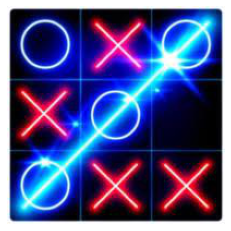


If you have never playes SUPER TIC-TAC-TOE write help for the instrucctions


How do you wanna play? Playe vs Player or Player vs PC


Choose 1 for Player vs Machine and 0 otherwise
1
You have chosen to play Player vs Machine

Choose the tiles you want to play with. You can choose "O" or "X".
X
You have choose the letter X. The other player will play with O

Choose the position where you wanna play (from 1 to 9):
1
                                       | X | - | - |
                                       | - | - | O |
                                       | - | - | - |

Choose the position where you wanna play (from 1 to 9):
3
                                       | X | O | X |
                                       | - | - | O |
                                       | - | - | - |

Choose the position where you wanna play (from 1 to 9):
5
                                       | X | O | X |
                                       | - | X | O |
                                      

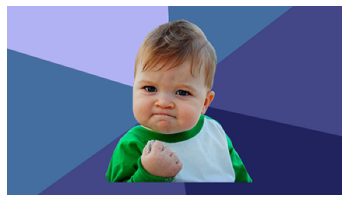


                                       --------THE USER WON THE MATCH--------


Do you wanna play again? Insert 1 for Yes or 0 for No

0


In [14]:
# ----------------------------- ENTRAMOS AL LOOP PRINCIPAL ---------------------------------------------------------

print('\033[1m' + '                                           -----WELCOME TO SUPER TIC-TAC-TOE!!!-----\n\n' + '\033[0m')

# Con estas funciones mostramos en pantalla una imagen que se encuentra en la misma carpeta que este archivo
plot_imag('tic_tac_toe.jpg')

# Mostramos el mensaje de ayuda para el jugador
print("\033[1m" + '\nIf you have never playes SUPER TIC-TAC-TOE write help for the instrucctions\n' + "\033[0m")

# Procedemos a la definicion de variables basicas para el juego
comb1 = permutation([0, 1, 2])
comb2 = permutation([3, 4, 5])
comb3 = permutation([6, 7, 8])
comb4 = permutation([0, 3, 6])
comb5 = permutation([1, 4, 7])
comb6 = permutation([2, 5, 8])
comb7 = permutation([0, 4, 8])
comb8 = permutation([2, 4, 6])
replay = 0

game_option = gameplay() # Llamamos a la funcion que nos permite escoger como queremos jugar
user, cpu = choose_letter() # Llamos la funcion choose letter para que el jugador escoja con que letra desea jugar


while replay == 0:
    game_table = ['-', '-', '-',  # Definimos nuestro tablero de juego
                  '-', '-', '-',
                  '-', '-', '-']
    user_win = 0
    user2_win = 0
    cpu_win = 0
    tie = 0
    
    # Loop para Player vs Player
    while user_win == 0 and user2_win == 0 and tie == 0 and game_option == 0:
        user_imput(game_table, user)
        show_board(game_table)
        user_win = check_win(game_table, user)
        
        if user_win == 0 and check_board_full(game_table) == 0:
            user_imput(game_table, cpu)
            show_board(game_table)
            
        user2_win = check_win(game_table, cpu)
        if user_win == 0 and user2_win == 0:
            tie = check_board_full(game_table)
    
    # Loop para Player vs Machine
    while user_win == 0 and cpu_win == 0 and tie == 0 and game_option == 1:
        user_imput(game_table, user) # Recibimos el imput del usuario
        user_win = check_win(game_table, user) #Comprobamos si el Usuario gano

        if user_win == 0: # Si el usuario no ha ganado entramos y la computadora puede ver si ella puede ganar
            winner_move = cpu_move_block_win(game_table, comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8, cpu, cpu)
            
        if winner_move == 0 and user_win == 0: #Significa que no hay jugada ganadora, y verifica si puede bloquear
            block_move = cpu_move_block_win(game_table, comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8, user, cpu)

        if block_move == 0 and winner_move == 0 and user_win == 0: #Significa que no hay jugada para bloquear y juega random
            computer_move(game_table, comb1, comb2, comb3, comb4, comb5, comb6, comb7, comb8, cpu)
        
        winner_move = 0 # Volvemos las variables 0 para los proximos loops
        block_move = 0
        cpu_win = check_win(game_table, cpu) #Comprobamos si la CPU gano
        show_board(game_table) # Mostramo el talbero de juego

        if user_win == 0 and cpu_win == 0:
            tie = check_board_full(game_table) # Comprobamos si hay un empate
     
    # Mensajes de victoria
    if user_win == 1 or cpu_win == 1 or user2_win == 1:
        plot_imag('memekid2.jpg')
        if user_win == 1:
            print("\033[1m" + '\n                                       --------THE USER WON THE MATCH--------' + "\033[0m")
        elif cpu_win == 1:
            print("\033[1m" + '\n                                    --------THE COMPUTER WON THE MATCH--------' + "\033[0m")
        elif user2_win == 1:
            print("\033[1m" + '\n                                    --------THE USER 2 WON THE MATCH--------' + "\033[0m")
    
    else:
        img = plot_imag('meme_monkey.jpg')
        print("\033[1m" + '\n                                       --------THE MATCH END IN A TIE--------' + "\033[0m")
        
    
    # Le preguntamos al jugador si quiere jugar otra vez. Si escoge 1 juega otra vez. Si toma 0 el juego termina
    replay = replay_game()